# Multivariate data visualisation
by Giancarlo Ruffo, Università degli Studi di Torino

When we import a dataset, when we are lucky, we need to analyse values contained in one or two columns. The basic charting methodologies we reviewed so far can be very effective, and you usually do not need more complicated visualisations than those. However, if you have to perform a multivariate data analysis, and you want to plot part of your dataset before, during and after your analysis overall process, you need to apply some slightly more sophisticated techniques. This notebook will help you to better select the most appropriate techniques to make a visual sense of your data. Hence, as usual, together with our methodological suggestions, we will propose some practical examples using `python` as a language and many libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, etc. To start, let's import these libraries using conventional wrappers.

In [216]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Data types

There is a popular 'chicken or egg' dilemma among data scientist: 'which came first: the question or the data?'. If you ask to me, I would reply that if you are a rigorous person and a serious scientist, you need a question first, and then you can dig your data.

Unfortunately, reality sometimes is disappointing. It happens frequently that dataset are given or found without a clear question has been formulated yet: 'please, do something with my data' is a classic offer that you can't refuse. Even when you have the question, your data are more stubborn than your scientific curiosity. They can hide among their rows and columns the answer you are looking for, but you should dig deeper and deeper before you start to find some clues. Hence, a more realistic solution to the 'question or data' dilemma is: 'first comes the question, then a preliminary analysis of your data, then you go to the question again, and finally you start digging through your dataset to find an evidence-based answer'.

As part of the preliminary analysis of your data set, is to understand which are the data types you are dealing with. You have the following options:

- **Numerical** data, that can be:
    - Continuous (-11.2, -1.3, 0.4, 4.8, 14.9, …)
    - Discrete (-2, -1, 0, 1, 2, …)
- **Categorical** data, that can be:
    - Ordered (e.g., months, such as January, February, March, April, …)
    - Unordered (e.g., colors, such as Red, Blue, Green, Purple, …)
- **Special/Structured**, such as,
    - Time (1998-01-27 12:00, 1999-04-13 22:10, …)
    - GPS (37.77679 latitude, -122.45117 longitude,…)
    - Social Security Numbers (555-55-5555,…)
    - ...
- **Unstructured/Semi-Structured**, e.g.,
    - Free-Form Text (Twitter Feed, Screenplay,…)
    - Mixed Types
    - ...

For example, let's import our famous `iris` dataset, and give it a look:

In [217]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Some background: The *Iris flower data set* or *Fisher's Iris data set* is a multivariate data set introduced by the British statistician and geneticist **Ronald Fisher** in his 1936 paper ["The use of multiple measurements in taxonomic problems". Annals of Eugenics 7 (2): 179–188](https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1469-1809.1936.tb02137.x)

It is sometimes called *Anderson's Iris data set* because the american botanist **Edgar Anderson** collected the data to quantify the morphologic variation of Iris flowers of three related species.

Two of the three species were collected in the *Gaspé Peninsula* '*all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus*'.

The data set consists of *50 samples* from each of three **species** of iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). *Four features* were measured from each sample: the **length and the width of the sepals and petals**, in *centimetres*.

Based on the combination of these four features, Fisher developed a discrimant model, that later was developed and generalized to the well known **linear discriminant model**, to distinguish the species from each other. So, he passed into history. 

To our practical purposes, our dataset has **one categorical-unordered data**, i.e., *species*, and **four numerical-continuous data**, i.e., *sepal_length, sepal_width, petal_length,* and *petal_width*.

We can only make a guess on the original questions of these gentlemen: Anderson's expertise was trained for years, maybe decades, and he was so confident to label irises that he could assign a species to each collected flower in the blink of an eye. We can presume that Anderson simply guessed that measuring petals and sepals would have returned enough information to find a simple mathematical formula so that everyone would have been able to distinguish these three species of irises. We know that Fisher solved this apparently simple problem inventing the Fisher's discriminant model. But what to do when your botanist buddy comes at your place for a cup of tea and with a dataset of 150 samples of flowers and you do not know anything about Fishers and Linear Discriminant Analysis (LDA) success stories? Of course, we need to start scraping the surface of your data. 

## A first attempt with descriptive statistics

It is your turn to start pre-processing your dataset. The wiser suggestion at the very beginning of every analysis, is to start with printing the basic *descriptive statistics*: for each column with numerical values, you can calculate mean, standard deviation and IQR values (i.e., minimum and maximum values, 75th and 25th percentiles, and the median). `pandas describe()` method will return the descriptive statistics of your dataframe.

In [218]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data in tabular forms are very convenient, but so far we learned how visualising numerical and statistical data can  give a great support to make sense of your information. If you want to summarize your numerical series, you better use the *box and whisker plot*. They can give you a first 'visual' hint to possibile discriminations for your group of data. Let's try if 

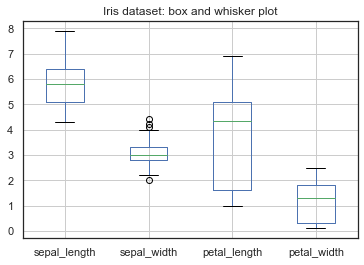

In [219]:
iris.boxplot();
plt.title('Iris dataset: box and whisker plot')
plt.show()

The above statistical and graphical description of the overall dataset is of little use, because it does not allow us to focus on our objective: finding a discriminant between our groups, that are not even plotted in our chart. However, it returns some practical clues on where we can start our analysis. Can you say which? 

Of course, there is not an unique answer (the data analysis workflow, from some points of view, has still preserved an artisanal core); however, if you look at the IQR ranges, we have different sizes and skewenesses in our four numerical attributes, but *petal_length* is the one exhibiting the wider range and also the more unbalanced skeweness. It can be a good starting point to zoom in and observing what happens to this attribute if we group our data by species. 

It could be a good idea to compare the `petal_length` distribution in our three groups as visualized with a box plot and as a scatterplot with jittering as we did with the `stripplot()` method in the previous notebook of this series. Jittering on the right returns a sense of *density* that is just summarized by the box plot on the left.

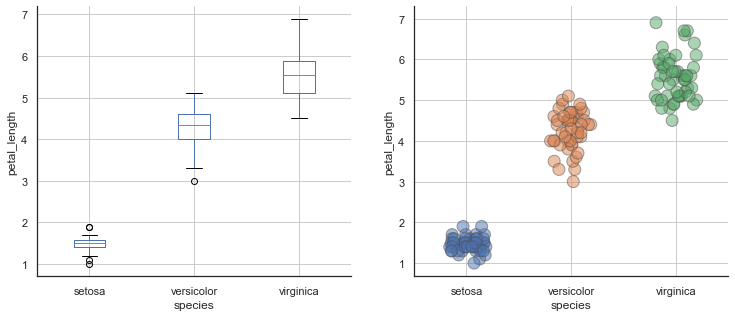

In [220]:
f, axes = plt.subplots(1, 2, figsize=(12,5))
iris.boxplot(column='petal_length', by='species', ax=axes[0])
axes[0].set_title('')
axes[0].set_ylabel('petal_length') 

sns.stripplot(iris.species, iris.petal_length, jitter=0.2, size=12, linewidth=1, alpha=0.5, ax=axes[1])
axes[1].set_title('')
axes[1].grid(True)

sns.despine()
plt.suptitle('')
plt.show()

### A side note on violin plots

Visually comparing IQR ranges and densities in a distribution is a nice task *per se*. You could be tempted to create a *box plot* together with *density lines* rotated and placed on each axis, to show the distribution shape of your data, as you did with marginal distributions layered on top and on the right of the density plot in the previous notebook. 

Otherwise, you can use a **violin plot**, that is commonly adopted to visualise the distribution of the data and its probability density. IRQ values are represented by means of a white dot (the median) in the middle of a thick black bar (the interquartile range); the max and the min values in the data are represented as the upper and the lower end points of the thin black line that extends the black bar. Density lines are rotated and placed on each side. 

Violin plots display more information than box plots, because the latter can hide significant details about how values in the data are distributed, or if the distribution is bimodal or multimodal. The cost of this additional informational value is that violin plots can be much noiser.

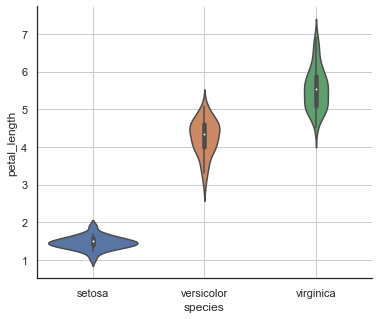

In [221]:
plt.figure(figsize=(6,5))
sns.violinplot(x="species", y="petal_length", data=iris)
plt.grid(True)
plt.title('')

sns.despine()
plt.show()

Whatever you decide to plot your *petal_length* distribution for each species, you will find out that discriminating *setosa* irises from the other two species it doesn't look like a big challenge anymore (Why?). 

Nevertheless, if you start to be a little bit boured of scraping the surface of your data, we cannot blame you. It is time for you to accept the incontrovertible truth: you are analysing a multivariate dataset, and if you want a full picture, you cannot focus on just one variable at a time. It is the time to explore further some plotting strategies to encourage comparisons on more dimensions within just one figure. 

## Small multiples



*Small multiple* as a term was introduced by (guess who?) Edward Tufte. In his *Envisioning Information* (1990) textbook, he said:
> At the heart of quantitative reasoning is a single question: Compared to what? Small multiple designs, multivariate and data bountiful, answer directly by visually enforcing comparisons of changes, of the differences among objects, of the scope of alternatives. For a wide range of problems in data presentation, small multiples are the best design solution.

After this authoritative introduction, small multiples (a.k.a. *trellis chart, lattice chart, grid chart*, or *panel chart*), look like the mythological visualisation creatures we are looking for. The basic idea is to partition our datsaset and each partition in one view of a multiple views grid. It is **fundamental that each view contains a similar chart at the same scale and axes**, to allow a straigthforward comparison.

Operatively speaking, we have to:
- Group data by a variable to divide it into subsets
- Create a small plot for each subset
- Show all subset plots on same page

Yoou can group data by *species*, and for each group you can have a different small plot for every numerical field in our dataset. As a consequence, your page will be made of a grid of 3 rows (for each *species*) and four columns (for each numerical attribute). Which basic plot can you adopt here? Again, it can be useful to make a question first. For example, a good one, could be: "*is there some numerical field in the iris dataset that allows for a better partition between groups than 'petal_lenght'?*". To answer properly, we should plot the overall data distribution for every numerical attribute, so that if we scan the corresponding column, we can look for possible clear divisions between different species; if we scan every row, we can spot differences of that particular attribute within the same species. A histogram would work just fine if our attribute was categorical or numerical-discrete; since it has continuous values, a density plot looks like the best choice.

Oberve that to share the same scale and axes for every small plot, pass `True` to the `sharex` and `sharey` arguments of the `sublots()` method.

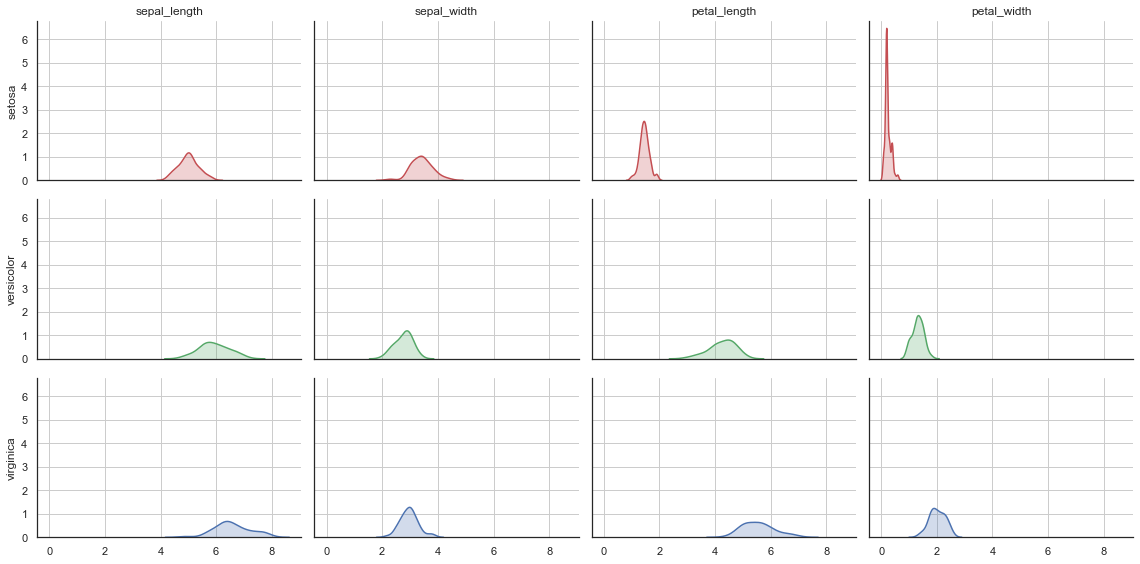

In [222]:
sns.set(style="white", color_codes=True)

fig,ax=plt.subplots(nrows=3,ncols=4, figsize=(16,8), sharex=True, sharey=True)

num = 0
species=iris.species.unique()
palette=['r','g','b']

r=0
for num in range(0,3*4): 
    # num, r and c point to current axes of the grid
    if (num!=0 and num%4 == 0): 
        r+=1
    c=num%4
    

    data = iris[iris.species==species[r]].iloc[:,c]
    sns.kdeplot(data, ax=ax[r,c], color=palette[r], shade=True, legend=False)
    if (r == 0): # set plot title to attribute name only for the first row
        ax[r,c].set_title(iris.columns.values[c])
    if (c == 0): # set y label to species only for the first column
        ax[r,c].set_ylabel(species[r])
        
    ax[r,c].grid(True)

sns.despine()
# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

plt.show()

Your small multiples figure suggests that the most promising feature for a clear distinction between species is *petal_length* (as already guessed): if you look at the second, a threshold set around $2$ will work efficiently to separate *setosa* irises from the other two species. Also *petal_width* (third column) could be used to find probably good discriminant intervals, even if visual analytics do not help to find exact values. 

Unfortunately, there is no clear separation between *virginica* and *versicolor* irises if you look at each attribute individually. The idea of trying something slightly more complicated as expressing the 'species' as a result of a linear combination of the numerical values, and not only as a result of the application of the rule of the thumb over a single attribute, is definitely well motivated. However, applying LDA techninques to this problem is much beyond of the scope of this notebook. If you are interested, there are a lot of good references around. One of my favorite can be found at [Juan Carlos González's Blog](https://www.apsl.net/blog/2017/07/18/using-linear-discriminant-analysis-lda-data-explore-step-step/).

### Discussion on Small Multiples
Every great idea comes with its set of pros and cons. Small multiples are *excellent for comparisons*, but this depends strongly on how you place the multiple views in the grid (try it out with different combinations!). They also require a variable to use for grouping. Categorical data are perfect for grouping, but also numerical-discrete information can be used as well. They are also very versatile and they can be used with any type of plot. However, it can be hard to tell exact values. Adding interaction to small multiples can remove this weak point. 


### More references on Small Multiples

- [using suplots() for small multiples](http://jonathansoma.com/lede/data-studio/classes/small-multiples/long-explanation-of-using-plt-subplots-to-create-small-multiples/)
- [small multiples on wikipedia](https://en.wikipedia.org/wiki/Small_multiple)


## Scatterplot matrix

- Scatter plot
    - Horizontal position maps to one variable
    - Vertical position maps to another variable
- Matrix of scatter plots
    - Each scatter plot focuses on one pair
    - Which pair is determined by row and column
    
To draw a scatterplot matrix with Python, the most convenient method is [seaborn pairplot()](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Pass a categorical attribute (e.g., `species`) in your data to argument `hue` to to map different colors to different values.

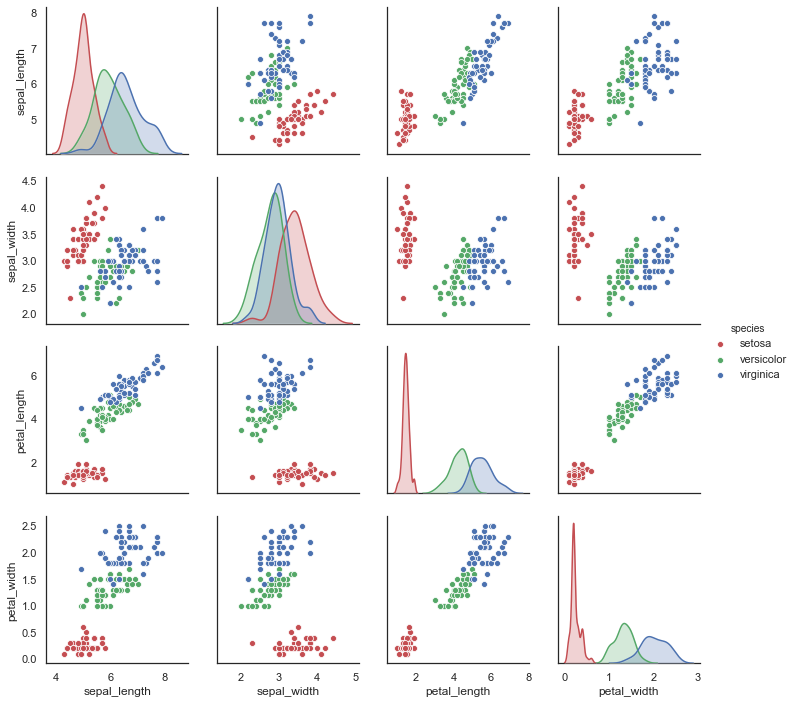

In [223]:
sns.pairplot(iris, hue="species", palette=palette)
plt.show()

### Discussion on Scatterplot matrix

- Good for exploration and comparison
    - Can be a little overwhelming at first
- Works with numerical or ordered data
- Form of small-multiples plot
    - Multiple scatter plots

## Heatmap

- Horizontal position: Column from dataset
- Vertical position: Row from dataset
- Box color: Value from row, column in dataset
    - Numerical or categorical
    
Use [seaborn heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

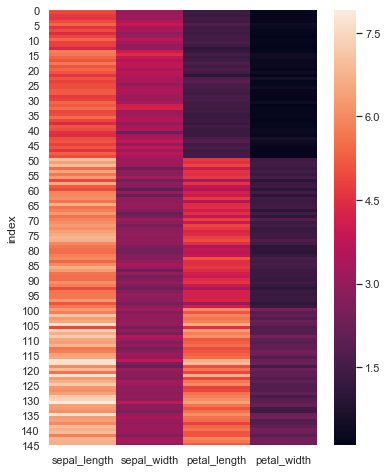

In [279]:
iris_hm = iris
iris_hm['index'] = range(0,150)
iris_hm = iris.set_index('index')

fig = plt.figure(figsize=(6,8))
sns.heatmap(iris_hm.drop(columns=['species']), yticklabels=5)
plt.tick_params(axis='x',rotation=0)
plt.show()

### Discussion on Heatmaps

- Essentially showing the dataset, but replaces numbers by color values
- Good for certain types of data
    - Continuous data well-suited
    - Unordered categorical limited to 7 categories
- Encourages comparison and pattern finding
    - Sorting changes patterns!

## Bubble Charts

- Horizontal position: Continuous data
- Vertical position: Continuous data
- Circle area: Numerical data
- Circle color: Numerical or categorical data

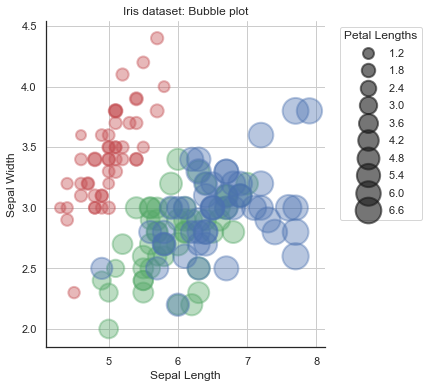

In [280]:
# Change color with c and alpha. Map the color to the species value.
species_palette = ['r' for i in range(0,50)] + ['g' for i in range(0,50)] + ['b' for i in range(0,50)]

fig, ax = plt.subplots(figsize=(5,6))

bubble = plt.scatter(iris.sepal_length, iris.sepal_width, 
            s=iris.petal_length*100, 
            c=species_palette, alpha=0.4, linewidth=2, label=iris.species)

# add a legend to bubble chart
handles, labels = bubble.legend_elements(prop="sizes", alpha=0.6, func=(lambda x: x/100))
plt.legend(handles, labels, title="Petal Lengths", loc='upper center', bbox_to_anchor=(1.20, 1))

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris dataset: Bubble plot")
sns.despine()
plt.grid(True)
plt.show()

### Discussion on Bubble Charts

- Able to encode four dimensions of data
    - Ideal if one dimension is categorical (color)
- Rough comparison possible
    - Beware comparing circle areas
- Obscuring data may be an issue
    - Large circles should be behind smaller ones
    - Issues increase with density
    
### More references on Bubble Charts
- [Bubble Charts - The Python Graph Library](https://python-graph-gallery.com/bubble-plot/)


## Parallel Coordinates

- Create one vertical line for every column: Numerical or ordered data
- Plot every row
    - x position is column
    - y position is value for that column
    - line connects values for a single row
- Picture an x y scatter plot, but putting both axis lines vertically

We use [plotly](https://plotly.com/python/parallel-coordinates-plot/) here because `parallel_coordinates()` method allows some interaction with data.

In [281]:
import plotly.express as px

# we need to color code each item in our dataset
species_id = [1 for i in range(0,50)] + [2 for i in range(0,50)] + [3 for i in range(0,50)]

fig = px.parallel_coordinates(iris, 
                              dimensions=['sepal_width', 'sepal_length', 'petal_width', 'petal_length'],
                              color = species_id,
                              color_continuous_scale = ['red','green','blue'])
fig.show()

### Discussion on Parallel Coordinates

- Long startup time
- Almost always requires interactivity
    - Choose column to color by
    - Choose how to sort
    - Highlighting (brushing)
    - Clustering
- Very high density and data ink ratio, low lie factor

### More references on Parallel Coordinates

- [Interpreting Parallel Coordinate Plot Visualizations](https://www.youtube.com/watch?v=xJEoEAI08UQ)
- [Parallel Plot - The Python Graph Library](https://python-graph-gallery.com/parallel-plot/)

## Radar/Star Plots

Same as a parallel coordinate plot, but drawn radially

### Discussion on Radar/Star Plots

- Gives a shape to the data
- When plotted on top of each other, must have some ability to highlight and filter
- Works decently for small multiples?
    - Requires small number of rows
- Better for data with a circular aspect?
    - Monthly temperature time series
    
### More references on Radar Plots

- [Radar Plot - The Python Graph Gallery](https://python-graph-gallery.com/radar-chart/)
- [Radar Chart - The Data Visualisation Catalogue](https://datavizcatalogue.com/methods/radar_chart.html)

## Other references

- [Visual Analytics for High Dimensional Data](https://www.serendipidata.com/posts/visualizing-high-dimensional-data)
- [Iris dataset on wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)